# Data analysis of Lucas's Poll 

## Tools importation

In [20]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Basic tools
import pandas            as pd
import pandas_profiling  as pdp
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
import matplotlib.dates  as mdates
%matplotlib inline

print('------------')
print('Tool version: ')
print(' - matplotlib : ' + str(mpl.__version__))
print(' - pandas     : ' + str(pd .__version__))
print(' - numpy      : ' + str(np .__version__))
print('------------')

# Plot settings
mpl.rcParams['legend.frameon'  ] = False
mpl.rcParams['legend.fontsize' ] = 'xx-large'
mpl.rcParams['xtick.labelsize' ] = 16
mpl.rcParams['ytick.labelsize' ] = 16
mpl.rcParams['axes.titlesize'  ] = 18
mpl.rcParams['axes.labelsize'  ] = 18
mpl.rcParams['lines.linewidth' ] = 2.5
mpl.rcParams['lines.markersize'] = 10

------------
Tool version: 
 - matplotlib : 2.1.0
 - pandas     : 0.22.0
 - numpy      : 1.13.3
------------


## Data preparation

In [21]:
# Load the data
featureName = ['stamp','YourName','date','time','gender','weight','size','name','HairAmount','HairColor','HairStyle','Sign']
mydata = pd.read_csv('Responses.csv', names=featureName, parse_dates=[['date', 'time']])
mydata = mydata[1:]
print('\nSize of the dataset: {}'.format(len(mydata)))

# Making binary sex column
binary_sex = mydata['gender']
binary_sex = [int('boy' in s) for s in binary_sex]
mydata['gender'] = binary_sex

# Adding time difference with expected delivery time (14 Oct - 12h)
mydata['dt']     = pd.to_datetime(mydata['date_time']) - pd.to_datetime('10-14-2017 12:00:00')
mydata['dtresp'] = pd.to_datetime(mydata['stamp'])     - pd.to_datetime('09-02-2017 09:00:00')
mydata['date']   = pd.to_datetime(mydata['date_time']).dt.date
mydata['hour']   = pd.to_datetime(mydata['date_time']).dt.hour
mydata['minute'] = pd.to_datetime(mydata['date_time']).dt.minute

# Adding answer time as date
mydata['stamp'] = pd.to_datetime(mydata['stamp'])
mydata.sort_values('stamp',inplace=True)

# Re-arrange the columns
old_cols = mydata.columns.tolist()
new_cols = [old_cols[1]] + old_cols[len(old_cols)-3:len(old_cols)] + [old_cols[0]] + old_cols[2:len(old_cols)-3]
mydata   = mydata[new_cols]

# Final conversions & printing
mydata = mydata.convert_objects(convert_numeric=True)
mydata.head()


Size of the dataset: 60


,stamp,date,hour,minute,date_time,YourName,gender,weight,size,name,HairAmount,HairColor,HairStyle,Sign,dt,dtresp
11,2017-09-02 16:11:32,2017-10-05,16,12,10/5/2017 4:12:00 PM,Mélisa Madar,1,3.40,54.0,Méliso,5,4,5,Beau gosse,-9 days +04:12:00,0 days 07:11:32
34,2017-09-02 17:57:35,2017-10-12,8,0,10/12/2017 8:00:00 AM,Madar Sylvia,1,3.02,50.0,Erwan Paul Thibaut,4,3,4,beau gosse,-3 days +20:00:00,0 days 08:57:35
7,2017-09-02 18:02:12,2017-10-02,0,0,10/2/2017 12:00:00 AM,Madar Eric,0,3.10,51.0,Léa Rose Cécilia,4,2,4,Fait bien ses nuits,-13 days +12:00:00,0 days 09:02:12
8,2017-09-02 23:03:20,2017-10-02,17,20,10/2/2017 5:20:00 PM,Julien Faivre,1,3.50,50.0,"Erwan, Robert, RomainJr",2,4,3,Un tatouage sur le bras,-12 days +05:20:00,0 days 14:03:20
20,2017-09-04 20:50:58,2017-10-10,14,0,10/10/2017 2:00:00 PM,Culle Jean,0,3.00,48.0,Jeanne Mireille Catherine,1,3,2,Un gros style,-4 days +02:00:00,2 days 11:50:58


In [22]:
pdp.ProfileReport(mydata)

Number of variables,17
Number of observations,60
Total Missing (%),0.0%
Total size in memory,8.0 KiB
Average record size in memory,137.3 B
Numeric,8
Categorical,4
Boolean,1
Date,1
Text (Unique),3
Rejected,0


## Statistical predictions  versus observation

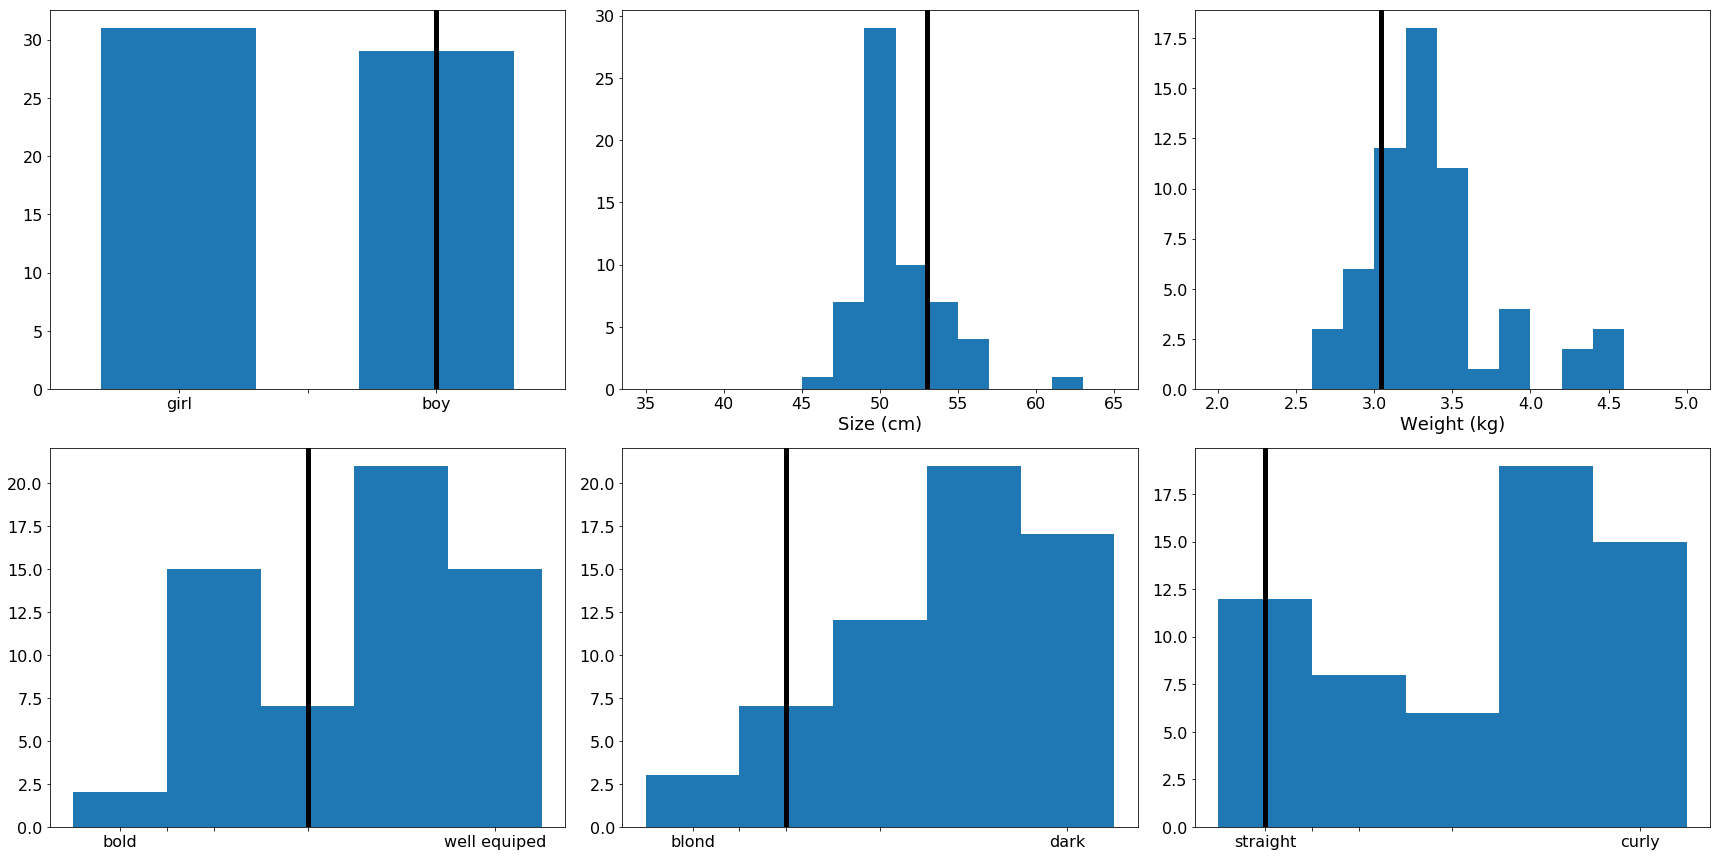

In [3]:
plt.figure(figsize=(24,12))

# Sex
plt.subplot(2,3,1)
plt.hist(mydata['gender'], bins=(-0.3,0.3,0.7,1.3) )
plt.xlim(-0.5,1.5)
plt.xticks([0,0.5,1],['girl','','boy'])
plt.axvline(x=1.0, color='black', linewidth=5.0)

# Size
plt.subplot(2,3,2)
plt.hist(mydata['size'], bins=15, range=(35,65))
plt.xlabel('Size (cm)')
plt.axvline(x=53.0, color='black', linewidth=5.0)

# Weight
plt.subplot(2,3,3)
plt.hist(mydata['weight'], bins=15, range=(2,5))
plt.xlabel('Weight (kg)')
plt.axvline(x=3.040, color='black', linewidth=5.0)

# Hair Amount
plt.subplot(2,3,4)
n,bins,_=plt.hist(mydata['HairAmount'], bins=5, range=(0.5,5.5))
plt.xticks([1,1.5,2,3,5],['bold','','','','well equiped'])
plt.axvline(x=3, color='black', linewidth=5.0)

# Hair Color
plt.subplot(2,3,5)
plt.hist(mydata['HairColor'], bins=5, range=(0.5,5.5))
plt.xticks([1,1.5,2,3,5],['blond','','','','dark'])
plt.axvline(x=2, color='black', linewidth=5.0)

# Hair Style
plt.subplot(2,3,6)
plt.hist(mydata['HairStyle'], bins=5, range=(0.5,5.5))
plt.xticks([1,1.5,2,3,5],['straight','','','','curly'])
plt.axvline(x=1, color='black', linewidth=5.0)

plt.tight_layout()
plt.savefig('guessed-values.png', dpi=200)

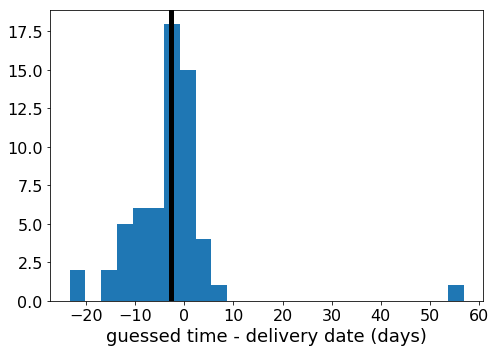

In [4]:
plt.figure(figsize=(7,5))
plt.hist( mydata['dt'].astype('timedelta64[h]')/24., bins=25)
plt.xlabel('guessed time - delivery date (days)')
dt_true = pd.to_datetime('10-11-2017 19:40:00') - pd.to_datetime('10-14-2017 12:00:00')
dt_true = dt_true.total_seconds() / (24*3600.)
plt.axvline(x=dt_true, color='black', linewidth=5.0)
plt.tight_layout()
plt.savefig('guessed-time.png', dpi=200)

## Time and date of answers

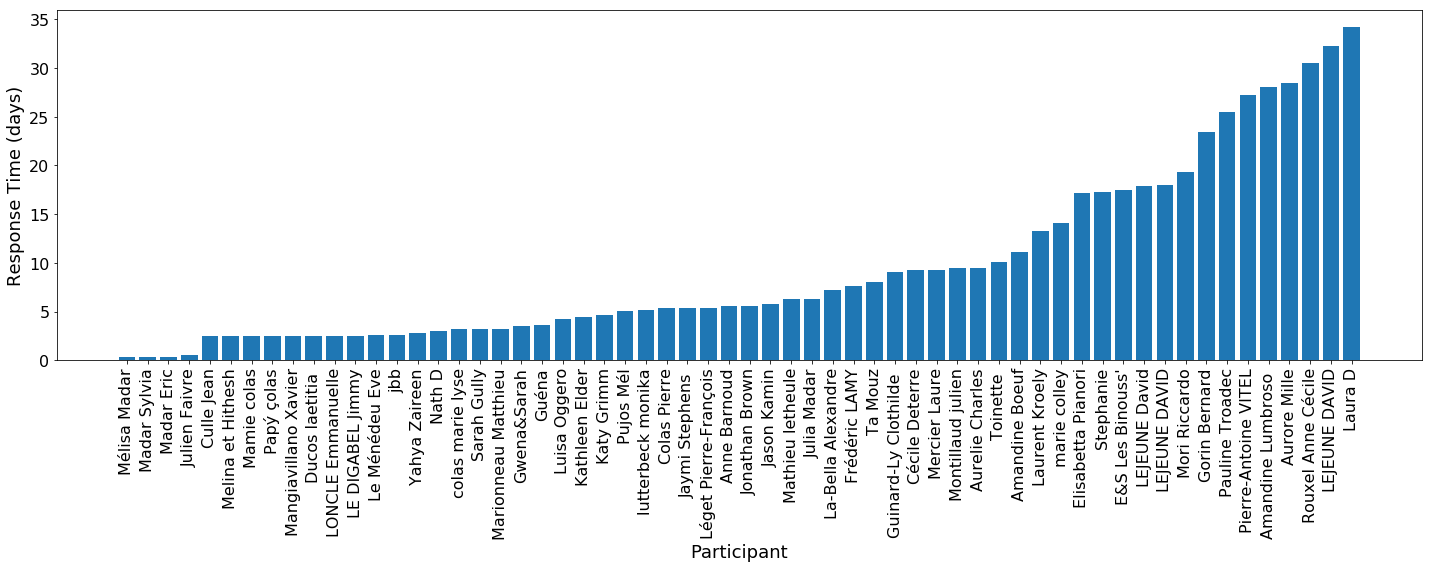

In [5]:
plt.figure(figsize=(20,8))
mydata_sorted = mydata.sort_values('dtresp')
names = mydata_sorted['YourName']
times = mydata_sorted['dtresp'].astype('timedelta64[h]')/24.
plt.bar(np.arange(len(names)), times)
plt.xticks(np.arange(len(names)), names, rotation='vertical')
plt.xlabel('Participant')
plt.ylabel('Response Time (days)')
plt.tight_layout()
plt.savefig('time-response-participant.png', dpi=200)

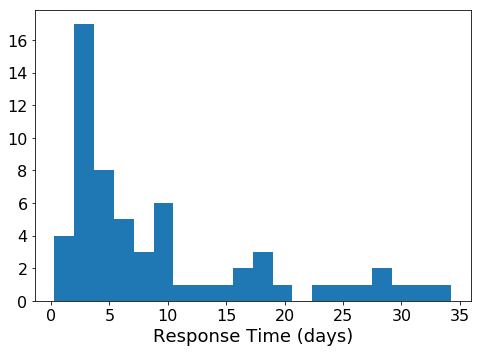

In [6]:
plt.figure(figsize=(7,5))
plt.hist( mydata['dtresp'].astype('timedelta64[h]')/24., bins=20)
plt.xlabel('Response Time (days)')
plt.tight_layout()
plt.savefig('time-response.png', dpi=200)

## Few correlation studies

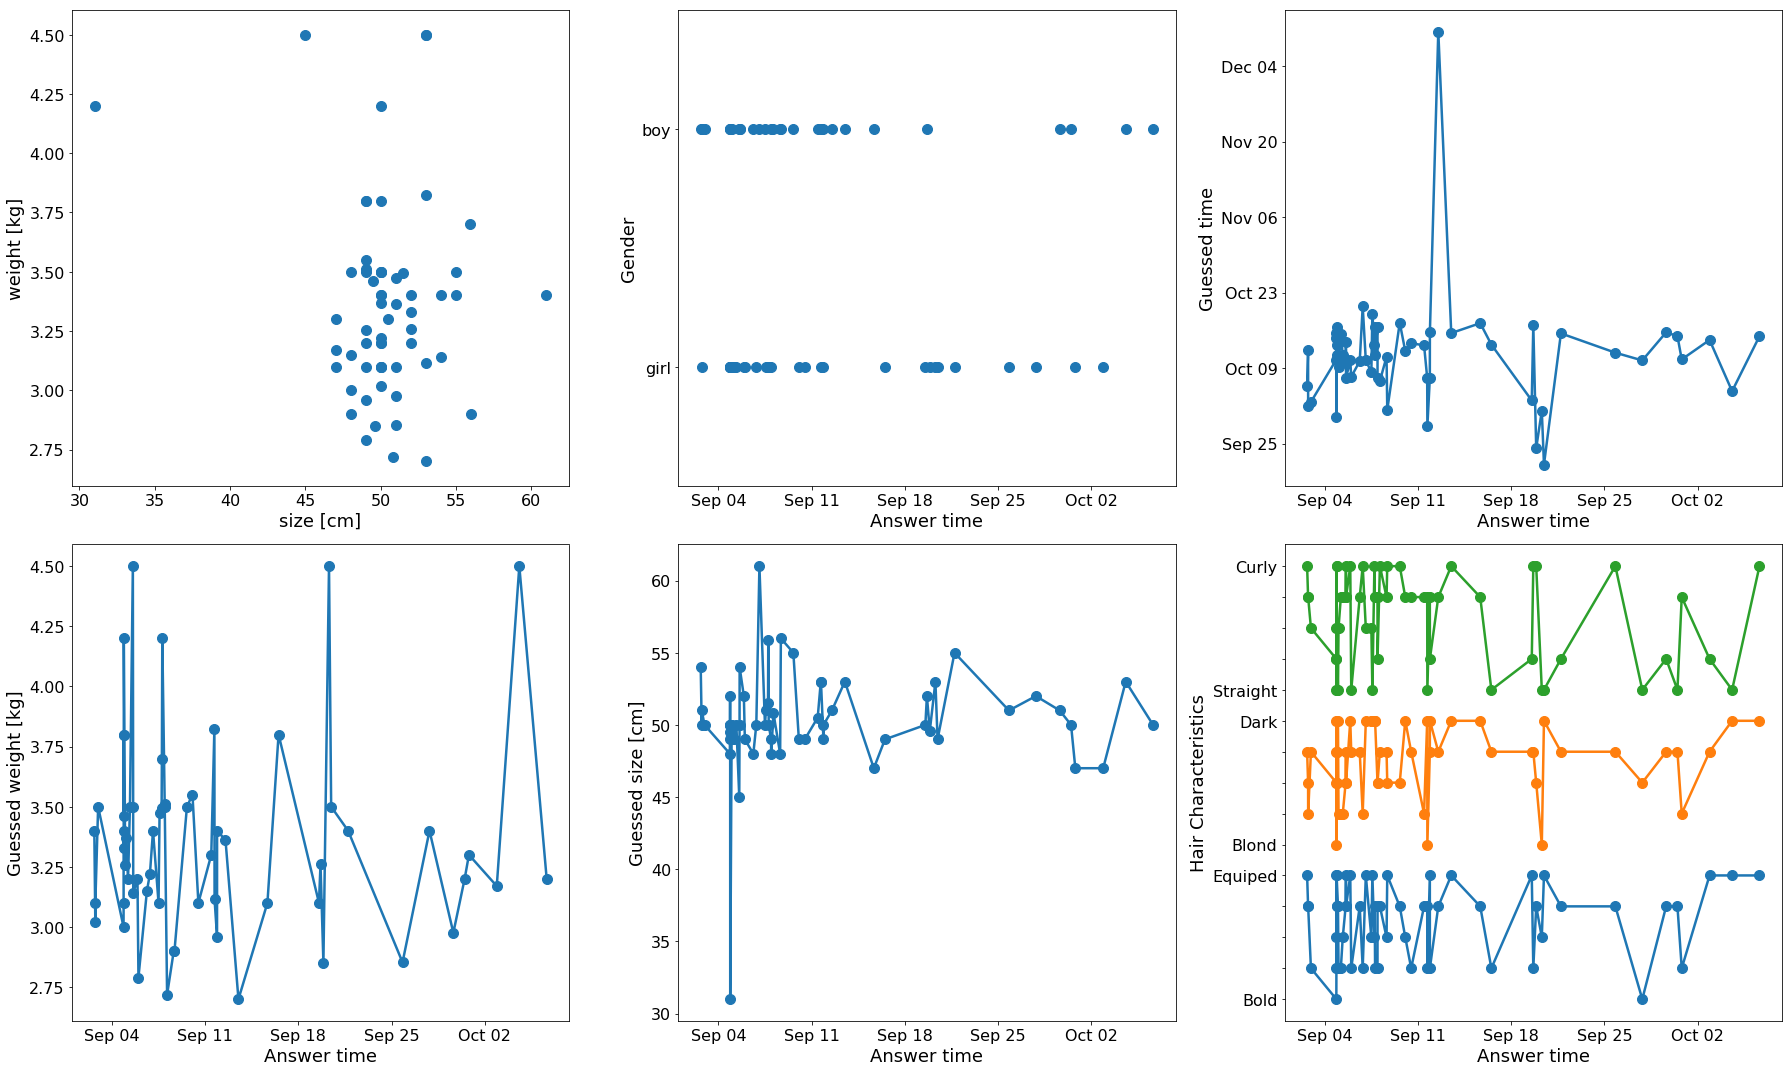

In [7]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
plt.scatter(mydata['size'],mydata['weight'])
plt.xlabel('size [cm]')
plt.ylabel('weight [kg]')

ax = plt.subplot(2,3,2)
ax.plot(mydata['stamp'], mydata['gender'], 'o' )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylim(-0.5,1.5)
ax.set_ylabel('Gender')
ax.set_yticks([0,1])
ax.set_yticklabels(['girl','boy'])

ax = plt.subplot(2,3,3)
ax.plot(mydata['stamp'], pd.to_datetime(mydata['date_time']), 'o-' )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.yaxis.set_major_locator(mdates.AutoDateLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylabel('Guessed time')

ax = plt.subplot(2,3,4)
ax.plot(mydata['stamp'], mydata['weight'], 'o-'  )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylabel('Guessed weight [kg]')

ax = plt.subplot(2,3,5)
ax.plot(mydata['stamp'], mydata['size'], 'o-' )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylabel('Guessed size [cm]')

ax = plt.subplot(2,3,6)
ax.plot(mydata['stamp'], mydata['HairAmount'], 'o-' )
ax.plot(mydata['stamp'], mydata['HairColor'] + 5, 'o-' )
ax.plot(mydata['stamp'], mydata['HairStyle'] + 10, 'o-' )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylabel('Hair Characteristics')
ax.set_yticks(range(1,16))
ax.set_yticklabels(['Bold','','','','Equiped','Blond','','','','Dark','Straight','','','','Curly'])

plt.tight_layout()
plt.savefig('correlations.png', dpi=200)

## Names analysis per gender

In [8]:
data_per_sex = mydata.groupby('gender')
for key,data in data_per_sex:
    if (key==0):
        dataGirl=data
    if (key==1):
        dataBoy = data

In [9]:
def getNames(data_frame):
    res=[]
    for name in data_frame['name']:
        for na in name.split(' '):
            if (na is not ''   and 
                na is not ' '  and 
                na is not ','  and
                na is not ';'  and 
                na is not '-'  and 
                '(' not in na  and
                ')' not in na    ):
                    finalname=na.replace(',','')
                    res.append( finalname )
                    
    ToBeRemoved = ['et','ou','hi']
    for s in ToBeRemoved:
        if (s in res):
            res.remove(s)
    res.sort()
    return res

namesGirl = getNames(dataGirl)
namesBoy  = getNames(dataBoy)

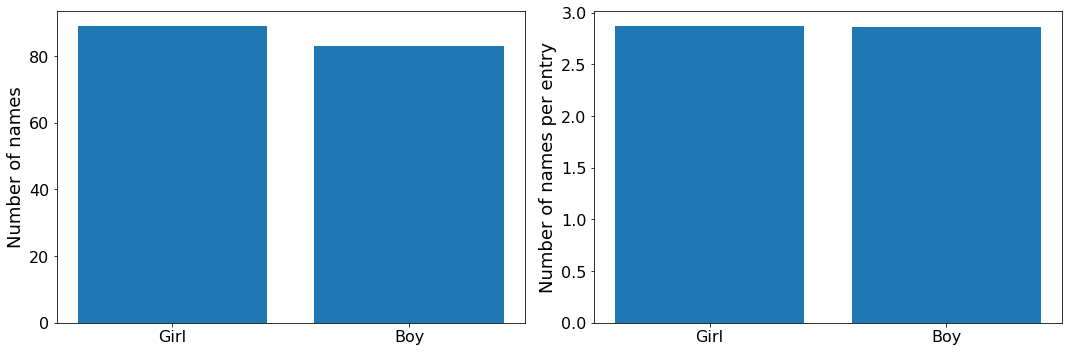

In [10]:
Ngirls = len(mydata[mydata['gender']==0])
Nboys  = len(mydata[mydata['gender']==1])
nameNumber = [len(namesGirl),len(namesBoy)]
nameRatio  = [len(namesGirl)/Ngirls,len(namesBoy)/Nboys]
sexIndex   = [0,1]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(sexIndex,nameNumber)
plt.xticks(sexIndex,['Girl','Boy'])
plt.ylabel('Number of names')
           
plt.subplot(1,2,2)
plt.bar(sexIndex,nameRatio)
plt.xticks(sexIndex,['Girl','Boy'])
plt.ylabel('Number of names per entry')

plt.tight_layout()
plt.savefig('name-number.png', dpi=200)

In [11]:
from collections import Counter

def plotNameFrequency(name_array, title='', n=1):
        
    # Get the count and keep names with more than n counts
    counts = Counter(name_array)
    labels, values = zip(*counts.items())
    
    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange/plot the data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]
    labels = labels[values>n]
    values = values[values>n] 
    plt.figure(figsize=(20,5))
    plt.bar(np.arange(len(labels)), values)
    plt.xticks(np.arange(len(labels)), labels, rotation='vertical')
    plt.title(title)
    plt.tight_layout()
    
    return

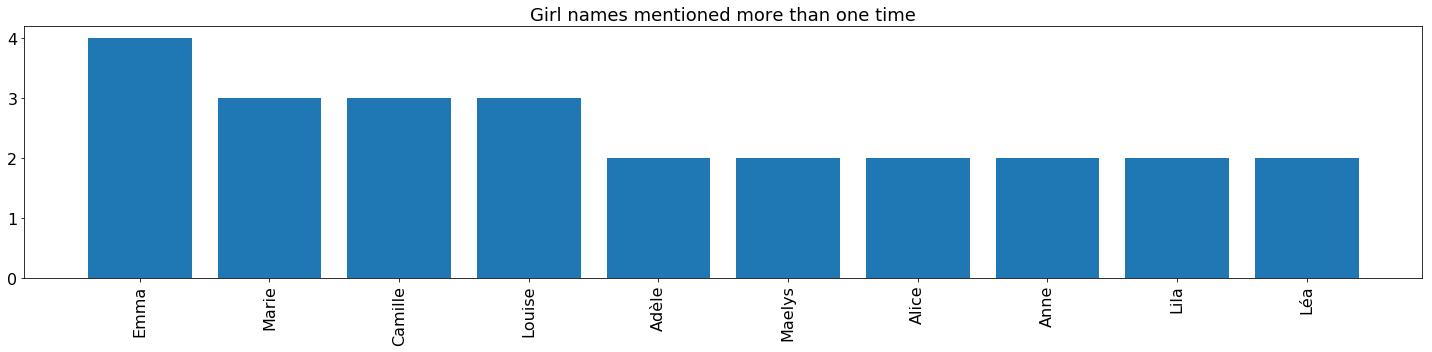

In [12]:
plotNameFrequency(namesGirl,'Girl names mentioned more than one time')
plt.savefig('name-girl.png', dpi=200)

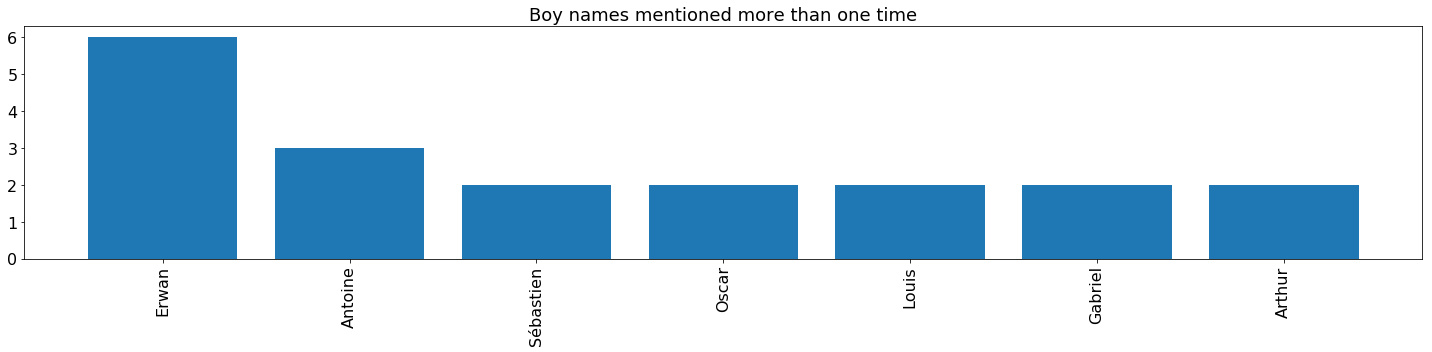

In [13]:
plotNameFrequency(namesBoy,'Boy names mentioned more than one time')
plt.savefig('name-boy.png', dpi=200)

## Who are the winners?

In [14]:
# Absolute birth time
dttrue = pd.to_datetime(mydata['date_time']) - pd.to_datetime('10-11-2017 19:40:00')
mydata['ddate_time'] = np.abs( dttrue.astype('timedelta64[h]') )

# Birthday
ddaytrue = pd.to_datetime(mydata['date']) - pd.to_datetime('10-11-2017')
mydata['ddays'] = np.abs( ddaytrue.astype('timedelta64[h]')/24.) + 0.05

# Birth hour
dtimetrue = (mydata['hour'] - 19) + (mydata['minute']-40)/60.
mydata['dtime'] = np.abs( dtimetrue )

# Size
mydata['dsize'] = np.abs(mydata['size'] - 52.5 )

# Weight
mydata['dweight'] = np.abs(mydata['weight'] - 3.040)

# Combining size & weight
mydata['dsizeweight'] = mydata['dweight'] + mydata['dsize']

# Hair
mydata['dHair'] = np.abs(mydata['HairAmount']-3) + np.abs(mydata['HairColor']-2) + np.abs(mydata['HairStyle']-1)

In [15]:
def makeBarPlotForWinner(varname,ylabel,n=3):
    is_sorted = mydata.sort_values(varname,ascending=True)
    names  = is_sorted['YourName']
    values = is_sorted[varname]
    ax = plt.bar(np.arange(n), values[:n])
    i=0
    for b in ax:
        isGenderCorrect = is_sorted.gender.values[i]==1
        if (not isGenderCorrect):
            b.set_color('#E8E8E8')
        i=i+1
    plt.xticks(np.arange(n), names[:n], rotation='vertical')
    plt.ylabel(ylabel)
    plt.legend()
    return ax

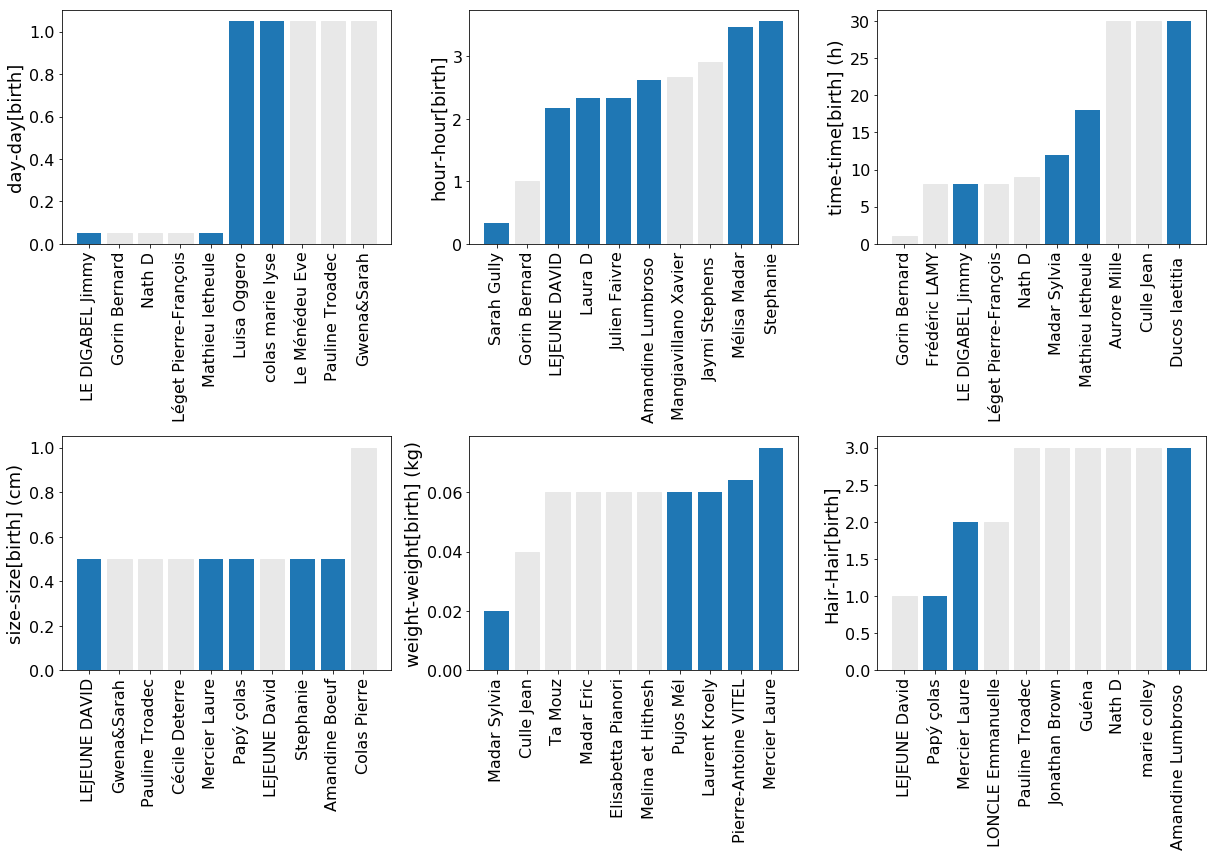

In [16]:
plt.figure(figsize=(17,12))

plt.subplot(2,3,1)
makeBarPlotForWinner('ddays','day-day[birth]',10)

plt.subplot(2,3,2)
makeBarPlotForWinner('dtime','hour-hour[birth]',10)

plt.subplot(2,3,3)
makeBarPlotForWinner('ddate_time','time-time[birth] (h)',10)

plt.subplot(2,3,4)
makeBarPlotForWinner('dsize','size-size[birth] (cm)',10)

plt.subplot(2,3,5)
makeBarPlotForWinner('dweight','weight-weight[birth] (kg)',10)

plt.subplot(2,3,6)
makeBarPlotForWinner('dHair','Hair-Hair[birth]',10)
                          
plt.tight_layout()
plt.savefig('winners.png', dpi=200)